<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/Causal_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometrics

#### Econometrics is the quantitative application of statistical and mathematical models using data to develop theories or test economic hypotheses to predict future trends from historical data.

# Time Series Data

A sequence of data points in time.

# Case study ... Paypal and BTC

1. 21/10/2020, Paypal announce BTC transactions
2. We can't compare price before and after because of the bull market and other volatility 
3. We need to find comprable control groups 

## OVB

Comparing before and after not possible because of OVB, bull market and other volatility e.g. US election

## Difference-in-differences framework

Create an aritifical control group (e.g. Google as other crypto move with BTC), vertical line denoting time of event (20th October), give BTC same slope as control group and compare to actual ... the difference (delta) is known as the 'treatment impact'

# Causal Impact Step-by-Step

1. Define the pre- and post-period (longer pre- means more robust analysis?)
2. Retrive data
3. Are the variables correlated in the pre-period?
4. Remove non-correlated data
5. Apply causal impact 

## Libraries and Data

In [ ]:
#install libraries

!pip install yfinance
!pip install tfcausalimpact

In [ ]:
#import libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Dates
training_start = '2020-09-01'
training_end = '2020-10-19'
treatment_start = '2020-10-20' #day before announcement, avoids issues with timezone
treatment_end = '2020-10-22'
end_stock = '2020-10-23'

In [ ]:
#Loading the financial data
y = yf.download(tickers = ['BTC-USD'],
                start = training_start,
                end = end_stock,
                interval = "1d")['Adj Close'].rename('y')

y[:3]

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
2020-09-02    11414.034180
2020-09-03    10245.296875
Name: y, dtype: float64

# ASSUMPTIONS

1. Parallel Trends Assumption ... assume the Treatment and Control groups have the same evolution for the KPI (i.e.develop in a similar pattern)

2. Confounding Change Assumption ... only one policy or initiative that differentiaties the TG from the CG

Assumptions can be strengthened with additional good control groups, using a longer training period (must research whether other event affected the analysis), keep post-period to a minimum



In [ ]:
stocks = ['ZAL.DE', 'SQ', 'CRSP', 'TRMB', 'JD', 'DE', 'KTOS', 'GOOG', 'AMZN', 'AAPL', 'NSC', 'FDX']

x = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1d")

x.head()

[*********************100%***********************]  12 of 12 completed


Adj Close                                                 \
                  AAPL        AMZN       CRSP          DE         FDX   
Date                                                                    
2020-09-01  131.975693  174.955994  93.419998  210.679596  214.926300   
2020-09-02  129.241348  176.572495  93.930000  210.118271  217.261780   
2020-09-03  118.894180  168.399994  85.690002  204.021149  211.248535   
2020-09-04  118.972862  164.731003  82.019997  204.534103  216.171951   
2020-09-07         NaN         NaN        NaN         NaN         NaN   

                                                                     ...  \
                 GOOG         JD       KTOS         NSC          SQ  ...   
Date                                                                 ...   
2020-09-01  83.035500  79.267685  19.700001  204.480927  166.660004  ...   
2020-09-02  86.414001  79.959557  19.910000  203.588181  162.880005  ...   
2020-09-03  82.092003  75.952454  19.520000  200.007629  152.860001  ...   
2020-09-04  79.552002  76.874954  19.260000  198.592468  146.389999  ...   
2020-09-07        NaN        NaN        NaN         NaN         NaN  ...   

               Volume                                                \
                 CRSP         DE        FDX        GOOG          JD   
Date                                                                  
2020-09-01   779500.0  1873400.0  1901800.0  36506000.0  11431400.0   
2020-09-02   532000.0  1983000.0  1680700.0  50224000.0  13860900.0   
2020-09-03  1278900.0  1975200.0  4003800.0  62156000.0  19254000.0   
2020-09-04  1570300.0  1662300.0  2879800.0  52172000.0  21500900.0   
2020-09-07        NaN        NaN        NaN         NaN         NaN   

                                                                 
                 KTOS        NSC          SQ       TRMB  ZAL.DE  
Date                                                             
2020-09-01   587600.0   973700.0  12306400.0   542300.0  790198  
2020-09-02   612800.0  1855100.0  11214800.0   728800.0  496554  
2020-09-03   847100.0  1485400.0  16421200.0  1220300.0  736259  
2020-09-04  1060000.0  1357200.0  17995200.0   914700.0  662250  
2020-09-07        NaN        NaN         NaN        NaN  362062  

[5 rows x 72 columns]

In [ ]:
#Preparing the data
x = x.iloc[:, :len(stocks)]
x.head(1)

Adj Close                                                        \
                  AAPL        AMZN       CRSP          DE       FDX     GOOG   
Date                                                                           
2020-09-01  131.975693  174.955994  93.419998  210.679596  214.9263  83.0355   

                                                                        
                   JD       KTOS         NSC          SQ   TRMB ZAL.DE  
Date                                                                    
2020-09-01  79.267685  19.700001  204.480927  166.660004  53.41   77.0

In [ ]:
x.columns = x.columns.droplevel() #remove 'Adj Close' heading
x.head(1)

,AAPL,AMZN,CRSP,DE,FDX,GOOG,JD,KTOS,NSC,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,,,
2020-09-01,131.975693,174.955994,93.419998,210.679596,214.9263,83.0355,79.267685,19.700001,204.480927,166.660004,53.41,77.0


In [ ]:
# Time zones

x.index = x.index.tz_localize(None) #no time zone
x.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [ ]:
#freq = 'B', means biz days only

In [ ]:
#Combine everything 
df = pd.concat([y, x], axis = 1).dropna()
df.head(1)

,y,AAPL,AMZN,CRSP,DE,FDX,GOOG,JD,KTOS,NSC,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,,,,
2020-09-01,11970.478516,131.975693,174.955994,93.419998,210.679596,214.9263,83.0355,79.267685,19.700001,204.480927,166.660004,53.41,77.0


# DATA ANALYSIS

In [ ]:
#prepare df with only training data

df_training = df[df.index <= training_end]
df_training.tail(1)

,y,AAPL,AMZN,CRSP,DE,FDX,GOOG,JD,KTOS,NSC,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,,,,
2020-10-19,11742.037109,114.074684,160.360504,107.720001,231.292221,269.56485,76.730499,77.461121,20.639999,202.932831,186.960007,51.970001,85.0


# Correlation in Time Series

Corr measures the direction of a relationship between two variables

In a long time-series correlation may be random

The data must be stationary (stationary time series) as opposed to a time dependent mean (a trend, mean grows over time), time depdendent variance, or time dependent covriance 

Stationary Time Series has a defined pattern ... Dickey-Fuller test, if p-val < 0.05 time series is considered stationary 

## How is data made to be stationary?

Time series = 5,9,1,7,3,7,4

Differencing = NA, 4, -8, 6, -4, 4, -3 (subtracting 5 from 9 etc.)


In [ ]:
# Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test = adfuller(x = df_training.y)[1] #p-val from Dickey-Fuller results output

In [ ]:
#So, the time series is not stationary

if test < 0.05:
  print("Stationary.")
else: 
  print("Not stationary.")

Not stationary.


In [ ]:
#Differencing ... subtract or divide 

#I assume pct_chance is compared to  previous day's adj close?
differencing = df_training.pct_change().dropna()
differencing.head()

,y,AAPL,AMZN,CRSP,DE,FDX,GOOG,JD,KTOS,NSC,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,,,,
2020-09-02,-0.046485,-0.020719,0.009239,0.005459,-0.002664,0.010866,0.040687,0.008728,0.010660,-0.004366,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,-0.080061,-0.046284,-0.087725,-0.029018,-0.027677,-0.050015,-0.050114,-0.019588,-0.017587,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,0.000662,-0.021787,-0.042829,0.002514,0.023306,-0.030941,0.012146,-0.013320,-0.007076,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.067295,-0.043944,-0.006828,-0.005205,-0.022422,-0.036863,-0.047250,-0.001558,-0.011239,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,0.039887,0.037707,0.046526,0.025114,0.021262,0.016034,0.012726,0.016641,0.026844,0.036662,0.019740,-0.009804


In [ ]:
if adfuller(x = differencing.y)[1] < 0.05:
  print("Stationary.")
else: 
  print("Not stationary.")
  

Stationary.


# Correlation matrix

<Axes: >

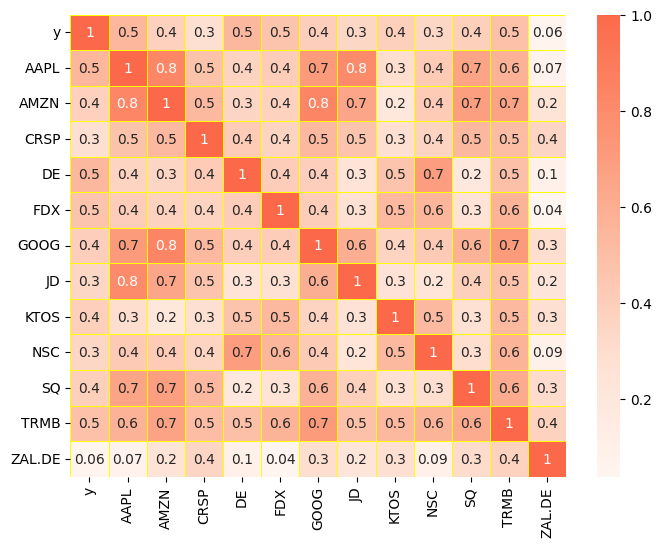

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'Reds',
            linecolor = 'yellow',
            linewidth = 0.65,
            center = True)


#Causal Impact

In [ ]:
#Removing weak correlation

df_final = df.drop(['ZAL.DE', 'NSC', 'JD', 'CRSP'], axis=1)
df_final.head(1)

,y,AAPL,AMZN,DE,FDX,GOOG,KTOS,SQ,TRMB
Date,,,,,,,,,
2020-09-01,11970.478516,131.975693,174.955994,210.679596,214.9263,83.0355,19.700001,166.660004,53.41


In [ ]:
#Pre-period and post-period

pre_period = [training_start, training_end]
post_period =[treatment_start, treatment_end]

In [ ]:
df_final

,y,AAPL,AMZN,DE,FDX,GOOG,KTOS,SQ,TRMB
Date,,,,,,,,,
2020-09-01,11970.478516,131.975693,174.955994,210.679596,214.926300,83.035500,19.700001,166.660004,53.410000
2020-09-02,11414.034180,129.241348,176.572495,210.118271,217.261780,86.414001,19.910000,162.880005,54.310001
2020-09-03,10245.296875,118.894180,168.399994,204.021149,211.248535,82.092003,19.520000,152.860001,50.900002
2020-09-04,10511.813477,118.972862,164.731003,204.534103,216.171951,79.552002,19.260000,146.389999,49.959999
2020-09-08,10131.516602,110.966576,157.492004,203.469513,211.325012,76.619499,19.230000,139.110001,49.139999
2020-09-09,10242.347656,115.392670,163.430496,208.579468,215.818222,77.848000,19.549999,144.210007,50.110001
2020-09-10,10363.138672,111.625572,158.755493,208.182648,214.565872,76.600998,19.469999,141.070007,49.160000
2020-09-11,10400.915039,110.160065,155.811005,209.005325,222.548508,76.036003,19.639999,137.449997,50.160000
2020-09-14,10680.837891,113.464851,155.148499,211.298981,225.942322,75.963997,20.680000,144.399994,50.430000


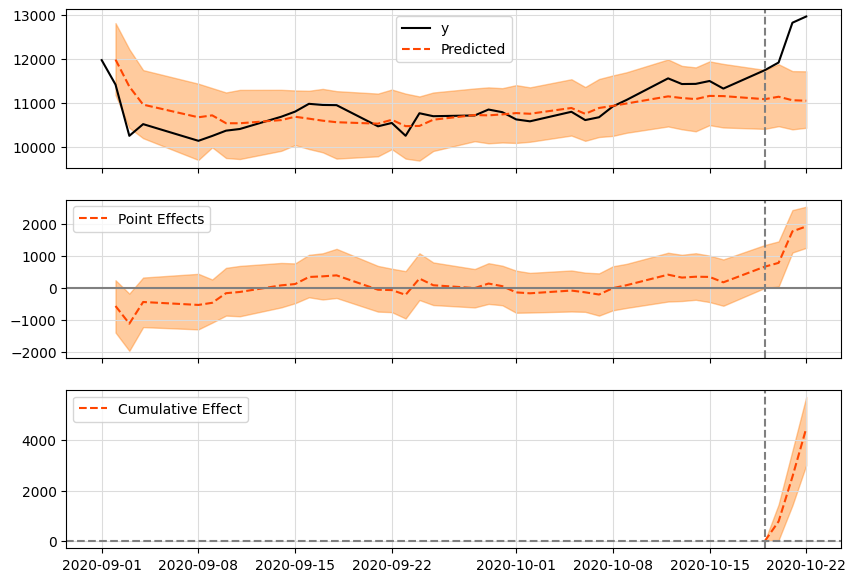

In [ ]:
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

impact.plot()

#Interpreting

2nd graph shows delta, when predicted above acutal then greater than zero etc.

Cumulative is delta for post-period, for stock data where we are interested only in the last adj close we can look at the 2nd graph ... price gradually increased then stabilised

In [ ]:
#Impact summary

#NB each time you will get different results 

print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12568.64           37705.91
Prediction (s.d.)         11079.6 (230.33)   33238.79 (691.0)
95% CI                    [10648.84, 11551.73][31946.52, 34655.19]

Absolute effect (s.d.)    1489.04 (230.33)   4467.12 (691.0)
95% CI                    [1016.91, 1919.8]  [3050.73, 5759.4]

Relative effect (s.d.)    13.44% (2.08%)     13.44% (2.08%)
95% CI                    [9.18%, 17.33%]    [9.18%, 17.33%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12568.64. By contrast, in the absence of an
intervention, we would have expected an average response of 11079.6.
The 95% interval of this counterfactual prediction is [10648.84, 11551.73].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1489.04 with a 95% interval of
[1016.91, 1919.8]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 37705.91.
By contrast, had the intervention not taken place, we would have expected
a sum of 33238.79. The 95% interval of this prediction is [31946.52, 34655.19].


The above results are given in terms of absolute numbers. In relative
te